In [104]:
import os
import urllib.request
import csv
import pandas as pd 
import numpy as np
import math

In [105]:
import seaborn as sns


<h3>Selected APIS : </h3>
<b>1.</b>https://www.quandl.com/api/v3/datasets/BITCOINWATCH/MINING.csv?
APi to get the data from bitcoin watch which contains data for information about ["Total BTC","Market Capitalization","Transactions last 24h","Transactions avg. per hour","Bitcoins sent last 24h","Bitcoins sent avg. per hour","Count","Blocks last 24h","Blocks avg. per hour","Difficulty","Next Difficulty","Network Hashrate Terahashs","Network Hashrate PetaFLOPS"
 ]
 <br/>
<b>2.</b>https://www.quandl.com/api/v3/datasets/BCHAIN/MKPRU.csv?api_key=
API to get information about "MarketPrice (USD)"
 <br/>
<b>3.</b>https://www.quandl.com/api/v3/datasets/BCHAIN/MWNTD.csv?api_key=
API to get information about"MyWallet Transactions per Day"
 <br/>
<b>4.</b>https://www.quandl.com/api/v3/datasets/BCHAIN/MWNUS.csv?api_key=
API to get information about "MyWallet Users"
 <br/>
<b>5.</b>https://www.quandl.com/api/v3/datasets/BCHAIN/MWTRV.csv?api_key=
API to get information about "MyWallet Trans Vol"
 <br/>

API Key used to retrieveinformation : osJhGEBNAdcE7CyhGnzM

In [106]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
api_key = "osJhGEBNAdcE7CyhGnzM"

<h2>Collect data from your chosen API(s) using Python</h2><br>
<b>The following functions are used to collect data from the 5 different apis</b>

In [108]:
#Function to file in which data from the API call is stored.
def create_file (file_loc, headings): 
    try: #Exception handilng
        with open(file_loc, "w",newline='') as write_file:
            f = csv.writer(write_file)
            f.writerow(headings)
        write_file.close()
    except IOError:
        print("Input Output Error")
    finally:
        print("File Creation Successful")

In [109]:
#function to call the API, retreive the raw csv data, and write to a file
def save_data(link, file_loc): 
    try: #exception handling
        response = urllib.request.urlopen(link)
        print(response.code)
        html = response.read().decode()
        with open(file_loc, "a",newline='') as write_file:  # prevents blank lines
            f = csv.writer(write_file)
            lines = html.strip().split("\n")
            for l in lines:
                if l[0] =="#": # makes sure comments are not written
                    continue
                else: 
                    l = l.split(",") 
                    f.writerow(l)
        write_file.close()
    except IOError:
        print("Saving failed due to IOError")
    finally:
        print("File successfully saved")



In [110]:
#function to build the api call link
def fetch_data(file_loc):
    link = "https://www.quandl.com/api/v3/datasets/BITCOINWATCH/MINING.csv?api_key="+api_key
    save_data(link, file_loc)

In [111]:
#Function to form the api url for the api call to retreieve data 
def get_data(file_loc,link,startdate,enddate):
    link=link+api_key+"&start_date="+startdate+"&end_date="+enddate # setting start date and end date to get data 
    #within that range from the api based on the first api call.
    print(link)
    save_data(link, file_loc)

<h3>Parse the collected data, and store it in an appropriate file format </h3>

The data from apis is collected combined and stored to a single dataframe and saved to a csv file.

In [230]:
#Loading Data for the first API Call
raw_file_loc = "bitchain.csv"
create_file (raw_file_loc, " ") # function call to the file in which the data is to be stored.
fetch_data(raw_file_loc) #function call to fetch data from the api and store it to the created file.
df=pd.read_csv(raw_file_loc) # reading the data from the saved csv file to the dataframe.

File Creation Successful
200
File successfully saved


The end date and start date for the consequent api calls are from from the date range of the first api call to 
limit the date range in the next api calls

In [231]:
#start and enddate parameters for the next apis found from the current dataframe so that they can be used to 
#limit the next api calls to this date range inorder to maintain intergrity of the data collected from
#different apis
enddate=df.iloc[0]["Date"] # enddate is found from the df loaded from the first api call
startdate=df.iloc[df.shape[0]-1]["Date"] # startdate is found from the df loaded from the first api call

In [232]:
startdate

'2013-08-26'

In [233]:
enddate

'2018-03-24'

In [234]:
#Setting the index variable to date of the main dataframe
df=pd.read_csv(raw_file_loc,index_col="Date")

In [118]:
df

,Total BTC,Market Cap,Transactions last 24h,Transactions avg. per hour,Bitcoins sent last 24h,Bitcoins sent avg. per hour,Count,Blocks last 24h,Blocks avg. per hour,Difficulty,Next Difficulty,Network Hashrate Terahashs,Network Hashrate PetaFLOPS
Date,,,,,,,,,,,,,
2018-03-24,16522800.0,1.410568e+11,NaN,NaN,NaN,NaN,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84
2018-03-23,16522800.0,1.424117e+11,NaN,NaN,NaN,NaN,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84
2018-03-22,16522800.0,1.428274e+11,NaN,NaN,NaN,NaN,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84
2018-03-21,16522800.0,1.434576e+11,NaN,NaN,NaN,NaN,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84
2018-03-20,16522800.0,1.459657e+11,NaN,NaN,NaN,NaN,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84
2018-03-19,16522800.0,1.477964e+11,NaN,NaN,NaN,NaN,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84
2018-03-18,16522800.0,1.404438e+11,NaN,NaN,NaN,NaN,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84
2018-03-17,16522800.0,1.344956e+11,NaN,NaN,NaN,NaN,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84
2018-03-16,16522800.0,1.320667e+11,NaN,NaN,NaN,NaN,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84


In [235]:
#Loading data for the 2nd Api Call which gets the Market Price of Bitcoin in USD
link = "https://www.quandl.com/api/v3/datasets/BCHAIN/MKPRU.csv?api_key="
marketshare_loc = "bitmarketshare123.csv"
create_file (marketshare_loc, " ") 
#get_raw_data1(marketshare_loc)
get_data(marketshare_loc,link,startdate,enddate)
marketprice=pd.read_csv(marketshare_loc,index_col="Date")

File Creation Successful
https://www.quandl.com/api/v3/datasets/BCHAIN/MKPRU.csv?api_key=osJhGEBNAdcE7CyhGnzM&start_date=2013-08-26&end_date=2018-03-24
200
File successfully saved


In [236]:
#Loading data for the 3rd Api Call to get bitcoin wallet transaction details
link = "https://www.quandl.com/api/v3/datasets/BCHAIN/MWNTD.csv?api_key="
mywallettrans_loc = "mywallettrans.csv"
create_file (mywallettrans_loc, " ") 
get_data(mywallettrans_loc,link,startdate,enddate)
waltrans=pd.read_csv(mywallettrans_loc,index_col="Date")

File Creation Successful
https://www.quandl.com/api/v3/datasets/BCHAIN/MWNTD.csv?api_key=osJhGEBNAdcE7CyhGnzM&start_date=2013-08-26&end_date=2018-03-24
200
File successfully saved


In [237]:
#Loading data for the 4th Api Call to get bitcoin wallet users details
link = "https://www.quandl.com/api/v3/datasets/BCHAIN/MWNUS.csv?api_key="
mywalletusers_loc = "mywalletusers.csv"
create_file (mywalletusers_loc, " ") 
get_data(mywalletusers_loc,link,startdate,enddate)
walusers=pd.read_csv(mywalletusers_loc,index_col="Date")

File Creation Successful
https://www.quandl.com/api/v3/datasets/BCHAIN/MWNUS.csv?api_key=osJhGEBNAdcE7CyhGnzM&start_date=2013-08-26&end_date=2018-03-24
200
File successfully saved


In [238]:
#Loading data for the 5th Api Call to get bitcoin wallet transaction volume details
link ="https://www.quandl.com/api/v3/datasets/BCHAIN/MWTRV.csv?api_key="
mywallettrsvol_loc = "mywallettrsvol.csv"
create_file (mywallettrsvol_loc, " ") 
get_data(mywallettrsvol_loc,link,startdate,enddate)
waltransvol=pd.read_csv(mywallettrsvol_loc,index_col="Date")

File Creation Successful
https://www.quandl.com/api/v3/datasets/BCHAIN/MWTRV.csv?api_key=osJhGEBNAdcE7CyhGnzM&start_date=2013-08-26&end_date=2018-03-24
200
File successfully saved


<h3> Load and represent the data using an appropriate data structure. Apply any pre-processing steps to clean/filter/combine the data</h3>

<h4>Data loaded from the 2nd, 3rd, 4th and 5th API calls are then processed into one dataframe.
The main dataframe has got indexes as dates and the indexes are stored to a list and this list is 
used to find which data is available in the other api calls based on the key date. If the data is found in other api calls for 
the corresponding date then the data is replaced with the nan values that are populated to the column while the column was 
created. This ensure that the data is stored for the correct date and lets us combine the information from differnt api calls
to one single dataframe</h4>

In [239]:
#getting the list of dates in the main df to match with the dates in the data collected from the 
# 2nd,3rd,4th and 5th api calls to intergrate data into the main dataframe
dfdates=df.index.tolist()

<h4>Functions to populate the data in the corresponding columns in the dataframe from the respective apis based on the dates in which the record is entered for. </h4>

In [240]:
#adding marketprice to the main dataframe
#adding values to corresponding row to the main dataframe from the second api call based on matching dates
marketpricekeylist=marketprice.index.tolist() # getting the list of date in the api call
df["MarketPrice (USD)"]=np.nan # filing the newly created column with nan values
for i in range(len(dfdates)): #iterating over the list of keys for the main dataframe.
    date=dfdates[i]#date for the record under consideration now.
    if(date in marketpricekeylist): # checks for the date in the bew api call key list of dates
        df['MarketPrice (USD)'][date]=marketprice.loc[date] #if condition turns out to be true then the value nan
        #is replaced with the corresponding data in the new api call

In [241]:
#My wallet columns - adding data from the 3rd,4th and 5th api calls to the main dataframe by matching the dates
#which gives a sense of My Wallet usage,transactions and the volume coupled from different apis integrated to one
#data frame which makes it easier to manipulate and visualize them to find patterns
#Transaction per day
waltranskeylist=waltrans.index.tolist()
df["MyWallet Transactions per Day"]=np.nan # filing the newly created column with nan values
for i in range(len(dfdates)): 
    date=dfdates[i]
    if(date in waltranskeylist):
        df["MyWallet Transactions per Day"][date]=waltrans.loc[date]

#No of mywallet users
mywaluserkeylist=walusers.index.tolist()
df["MyWallet Users"]=np.nan
for i in range(len(dfdates)):
    date=dfdates[i]
    if (date in mywaluserkeylist):
        df["MyWallet Users"][date]=walusers.loc[date]

#MyWallet Transaction Volume
waltransvolkeylist=waltransvol.index.tolist()
df["MyWallet Trans Vol"]=np.nan
for i in range(len(dfdates)):
    date=dfdates[i]
    if(date in waltransvolkeylist):
        df["MyWallet Trans Vol"][date]=waltransvol.loc[date]

<h4>Dropping the counts column which is not used for subsequent analysis</h4>

In [242]:
#dropping the column Count which is not used for any of the subsequent analysis
df=df.drop(["Count"],axis=1)

<h5>Checking for null values in the main dataframe and taking counts of the nan values in each column</h5><br/>
<h6>The 3rd,4th,5th, and 6th columns have 306 nan values in each of then and the my wallet users columns from the 4th api call contains 22 nan values.</h6>

In [127]:
#checking for null values in the main dataframe df
df.isnull().sum()

Total BTC                          0
Market Cap                         0
Transactions last 24h            308
Transactions avg. per hour       308
Bitcoins sent last 24h           308
Bitcoins sent avg. per hour      308
Count                              0
Blocks last 24h                    0
Blocks avg. per hour               0
Difficulty                         0
Next Difficulty                    0
Network Hashrate Terahashs         0
Network Hashrate PetaFLOPS         0
MarketPrice (USD)                  0
MyWallet Transactions per Day      0
MyWallet Users                    22
MyWallet Trans Vol                 0
dtype: int64

<h5>The following function cleans the dataframe by replacing the column values which are nan with the mean values for the columns</h5>

In [128]:
#So it has been found that the data frame has null values for the columns Transactions last 24h,
#Transactions avg. per hour,Bitcoins sent last 24h,Bitcoins sent avg. per hour and the MyWallter Users column 
#which is to be cleaned before any futher processing of the data can be done

#Function to clean the dataframe of nan values by the replaceing the nan values with the corresponding column
#means and returns the cleaned dataframe
def cleaningDataFrame(df):
    #cleaning up the main dataframe of nan values
    #The 'Transactions last 24h','Transactions avg. per hour','Bitcoins sent last 24h','Bitcoins sent avg. per hour'
    #are the columns with nan values in them and the suitbale way to handle them is to replace the nan values using the
    #mean of the columns
    mean1=df['Transactions last 24h'].mean()
    mean2=df['Transactions avg. per hour'].mean()
    mean3=df['Bitcoins sent last 24h'].mean()
    mean4=df['Bitcoins sent avg. per hour'].mean()
    mean5=df['MyWallet Users'].mean()

    #storing the cleand value to another dataframe called dfcleaned
    dfcleaned=df

    #replaceing the nan values with the corresponding coloumn mean values
    dfcleaned['Transactions last 24h'] = dfcleaned['Transactions last 24h'].fillna(mean1)
    dfcleaned['Transactions avg. per hour']=dfcleaned['Transactions avg. per hour'].fillna(mean2)
    dfcleaned['Bitcoins sent last 24h']=dfcleaned['Bitcoins sent last 24h'].fillna(mean3)
    dfcleaned['Bitcoins sent avg. per hour']=dfcleaned['Bitcoins sent avg. per hour'].fillna(mean4)
    dfcleaned['MyWallet Users']=dfcleaned['MyWallet Users'].fillna(mean4)
    return dfcleaned

<h5>Calling the cleaningDataFrame function to replace all the nan values in the dataframe so that it can be used for analysis</h5>

In [244]:
#calling the function to preprocess the dataframe to remove all the nan values in the dataframe
dfcleaned=cleaningDataFrame(df)

In [130]:
dfcleaned

,Total BTC,Market Cap,Transactions last 24h,Transactions avg. per hour,Bitcoins sent last 24h,Bitcoins sent avg. per hour,Count,Blocks last 24h,Blocks avg. per hour,Difficulty,Next Difficulty,Network Hashrate Terahashs,Network Hashrate PetaFLOPS,MarketPrice (USD),MyWallet Transactions per Day,MyWallet Users,MyWallet Trans Vol
Date,,,,,,,,,,,,,,,,,
2018-03-24,16522800.0,1.410568e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8686.826667,40321.0,23808826.0,3.576649e+04
2018-03-23,16522800.0,1.424117e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8690.408333,43862.0,23791603.0,5.332037e+04
2018-03-22,16522800.0,1.428274e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8947.753333,45291.0,23776420.0,6.226345e+04
2018-03-21,16522800.0,1.434576e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8986.948333,45750.0,23754157.0,4.915556e+04
2018-03-20,16522800.0,1.459657e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8412.033333,45007.0,23738861.0,6.991811e+04
2018-03-19,16522800.0,1.477964e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8171.415000,32383.0,23719698.0,2.544061e+04
2018-03-18,16522800.0,1.404438e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,7993.674644,33230.0,23704090.0,2.891038e+04
2018-03-17,16522800.0,1.344956e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8530.402000,41752.0,23690016.0,4.724604e+04
2018-03-16,16522800.0,1.320667e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8358.121667,44906.0,23667203.0,5.487910e+04


<h5>Saving the cleaned dataframe to a csv file</h5>

In [131]:
#Saving the cleaned dataset to a new file.
cleaneddatasetfile="CleanedDataSet.csv"
dfcleaned.to_csv(cleaneddatasetfile)

In [132]:
dfcleaned=pd.read_csv(cleaneddatasetfile,index_col="Date")#loading the data from the saved csv file.

In [133]:
dfcleaned

,Total BTC,Market Cap,Transactions last 24h,Transactions avg. per hour,Bitcoins sent last 24h,Bitcoins sent avg. per hour,Count,Blocks last 24h,Blocks avg. per hour,Difficulty,Next Difficulty,Network Hashrate Terahashs,Network Hashrate PetaFLOPS,MarketPrice (USD),MyWallet Transactions per Day,MyWallet Users,MyWallet Trans Vol
Date,,,,,,,,,,,,,,,,,
2018-03-24,16522800.0,1.410568e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8686.826667,40321.0,23808826.0,3.576649e+04
2018-03-23,16522800.0,1.424117e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8690.408333,43862.0,23791603.0,5.332037e+04
2018-03-22,16522800.0,1.428274e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8947.753333,45291.0,23776420.0,6.226345e+04
2018-03-21,16522800.0,1.434576e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8986.948333,45750.0,23754157.0,4.915556e+04
2018-03-20,16522800.0,1.459657e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8412.033333,45007.0,23738861.0,6.991811e+04
2018-03-19,16522800.0,1.477964e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8171.415000,32383.0,23719698.0,2.544061e+04
2018-03-18,16522800.0,1.404438e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,7993.674644,33230.0,23704090.0,2.891038e+04
2018-03-17,16522800.0,1.344956e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8530.402000,41752.0,23690016.0,4.724604e+04
2018-03-16,16522800.0,1.320667e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8358.121667,44906.0,23667203.0,5.487910e+04


<h5>The cleaned data frame has no nan values for any of the columns</h5>

In [134]:
dfcleaned.isnull().sum()

Total BTC                        0
Market Cap                       0
Transactions last 24h            0
Transactions avg. per hour       0
Bitcoins sent last 24h           0
Bitcoins sent avg. per hour      0
Count                            0
Blocks last 24h                  0
Blocks avg. per hour             0
Difficulty                       0
Next Difficulty                  0
Network Hashrate Terahashs       0
Network Hashrate PetaFLOPS       0
MarketPrice (USD)                0
MyWallet Transactions per Day    0
MyWallet Users                   0
MyWallet Trans Vol               0
dtype: int64

In [135]:
#the cleaned dataset has no nan values present in it after cleaning which means it can be used for analysis

<h5>The following function adds 2 columns month and year to the dataframe which makes it easier to group the data based on the year and month values. The year and month values are extracted from the date key of each record in the dataframe. This makes it easier to do aggregated analysis on the dataframe by grouping year,month or both.</h5>

In [136]:
#function to add month and year column to the dataframe based on the index keys to make it easier to group data
#based on the year , month or both
def addMonthandYearColumns(dframe):
    dframe['Year']=np.nan
    dframe['Month']=np.nan
    keys=dframe.index.tolist()
    for i in range(len(keys)):
        s=keys[i]
        year=s[:4]
        month=s[5:7]
        dframe['Year'][i]=year
        dframe['Month'][i]=month
    return dframe

<h5>Calling the addMonthandYearColumns() function to add the date and month column to the main dataframe.</h5>
These derived columns are used to group the data according the Year and Month

In [300]:
#adding month and year column to the cleaned dataset
dfcleaned=addMonthandYearColumns(dfcleaned)

In [138]:
dfcleaned

,Total BTC,Market Cap,Transactions last 24h,Transactions avg. per hour,Bitcoins sent last 24h,Bitcoins sent avg. per hour,Count,Blocks last 24h,Blocks avg. per hour,Difficulty,Next Difficulty,Network Hashrate Terahashs,Network Hashrate PetaFLOPS,MarketPrice (USD),MyWallet Transactions per Day,MyWallet Users,MyWallet Trans Vol,Year,Month
Date,,,,,,,,,,,,,,,,,,,
2018-03-24,16522800.0,1.410568e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8686.826667,40321.0,23808826.0,3.576649e+04,2018.0,3.0
2018-03-23,16522800.0,1.424117e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8690.408333,43862.0,23791603.0,5.332037e+04,2018.0,3.0
2018-03-22,16522800.0,1.428274e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8947.753333,45291.0,23776420.0,6.226345e+04,2018.0,3.0
2018-03-21,16522800.0,1.434576e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8986.948333,45750.0,23754157.0,4.915556e+04,2018.0,3.0
2018-03-20,16522800.0,1.459657e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8412.033333,45007.0,23738861.0,6.991811e+04,2018.0,3.0
2018-03-19,16522800.0,1.477964e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8171.415000,32383.0,23719698.0,2.544061e+04,2018.0,3.0
2018-03-18,16522800.0,1.404438e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,7993.674644,33230.0,23704090.0,2.891038e+04,2018.0,3.0
2018-03-17,16522800.0,1.344956e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8530.402000,41752.0,23690016.0,4.724604e+04,2018.0,3.0
2018-03-16,16522800.0,1.320667e+11,152519.490924,6354.979579,1.802472e+06,75102.986155,481823.0,0.0,0.00,9.232331e+11,8.877369e+11,6354668.57,80704290.84,8358.121667,44906.0,23667203.0,5.487910e+04,2018.0,3.0


<h3>Analyse and summarise the cleaned dataset¶</h3>

In [336]:
#Descriptive status of the cleaned dataframe
dfcleaned.describe()


,Total BTC,Market Cap,Transactions last 24h,Transactions avg. per hour,Bitcoins sent last 24h,Bitcoins sent avg. per hour,Blocks last 24h,Blocks avg. per hour,Difficulty,Next Difficulty,Network Hashrate Terahashs,Network Hashrate PetaFLOPS,MarketPrice (USD),MyWallet Transactions per Day,MyWallet Users,MyWallet Trans Vol,Year,Month
count,1.520000e+03,1.520000e+03,1520.000000,1520.000000,1.520000e+03,1.520000e+03,1520.000000,1520.000000,1.520000e+03,1.520000e+03,1.520000e+03,1.520000e+03,1520.000000,1520.000000,1.520000e+03,1.520000e+03,1520.000000,1520.000000
mean,1.474578e+07,2.918456e+10,152519.490924,6354.979579,1.802472e+06,7.510299e+04,123.465132,5.144928,2.749522e+11,2.737457e+11,1.959550e+06,2.488629e+07,1810.354311,47331.321053,7.541713e+06,1.694944e+05,2015.498684,6.430263
std,1.553094e+06,5.386447e+10,79082.473935,3295.103078,2.294541e+06,9.560586e+04,65.207534,2.717229,3.263694e+11,3.188175e+11,2.282187e+06,2.898378e+07,3247.243681,26008.013463,6.477472e+06,3.557122e+05,1.385526,3.512473
min,1.160878e+07,1.342254e+09,1407.000000,58.630000,1.395002e+04,5.812500e+02,0.000000,0.000000,6.575006e+07,6.849834e+07,4.903300e+02,6.227190e+03,104.470000,0.000000,7.510299e+04,0.000000e+00,2013.000000,1.000000
25%,1.341520e+07,4.938153e+09,80508.000000,3354.500000,8.953331e+05,3.730554e+04,129.000000,5.380000,3.573985e+10,3.614766e+10,2.587550e+05,3.286189e+06,360.732500,27914.500000,2.275472e+06,4.897219e+04,2014.000000,3.000000
50%,1.520575e+07,7.844092e+09,152519.490924,6354.979579,1.802472e+06,7.510299e+04,148.000000,6.170000,1.441164e+11,1.552453e+11,1.111289e+06,1.411337e+07,584.835000,48004.000000,5.764072e+06,1.172427e+05,2016.000000,6.000000
75%,1.618857e+07,1.704690e+10,214311.750000,8929.655000,2.037435e+06,8.489312e+04,161.000000,6.710000,4.407799e+11,4.569902e+11,3.271263e+06,4.154505e+07,1064.887329,64518.500000,1.177239e+07,2.138588e+05,2017.000000,10.000000
max,1.652280e+07,3.172873e+11,372103.000000,15504.290000,6.735430e+07,2.806429e+06,257.000000,10.710000,9.232331e+11,9.316186e+11,6.668786e+06,8.469358e+07,19498.683333,122796.000000,2.380883e+07,8.484600e+06,2018.000000,12.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x139f78208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13ae05860>]], dtype=object)

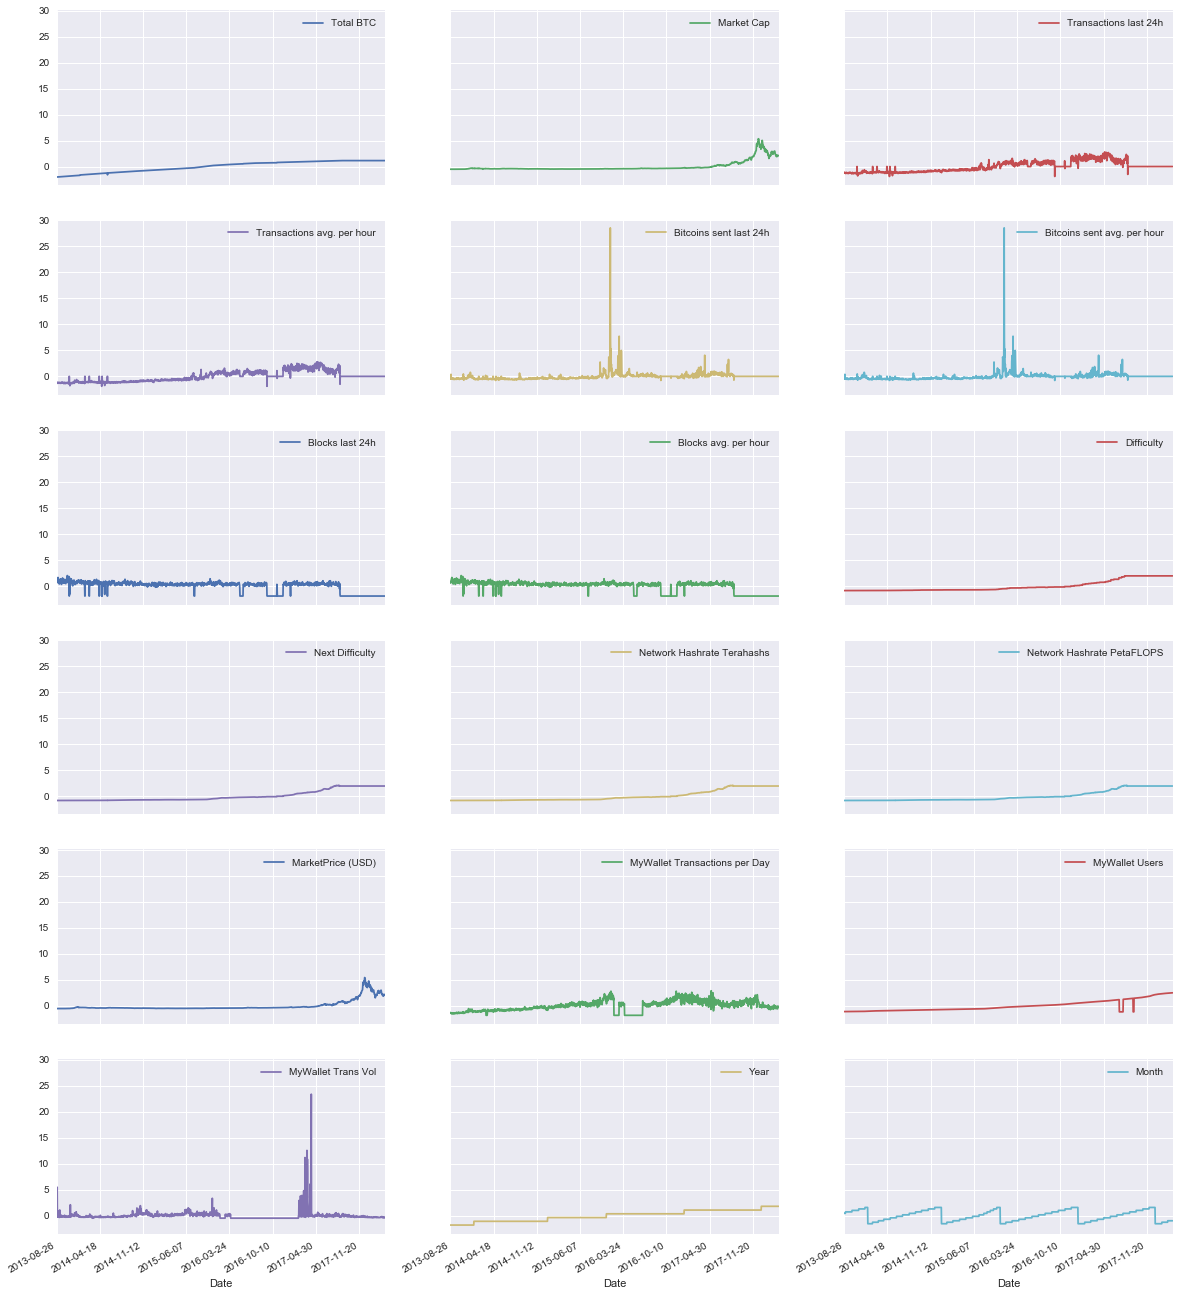

In [340]:
dd=(dfcleaned - dfcleaned.mean())/dfcleaned.std()#normalizing the dataframe to plot the values making it easier to visualise
d1=dd.iloc[::-1]#reversing the data frame to make the plots go from past to future direction
d1.plot(kind='line', subplots=True, layout=(6,3), figsize=(20,25), sharey=True)

The above plot which containsa subplot for each feature and their corresponding changes gives and overall picture about the features and how they change with time

<h5>Getting data to plot the MyWallet information from the 3rd,4th,and 5th api calls.</h5>

In [143]:
#Getting data to plot wallet data - number of users,transaction volume, transactions per day
dfwallet=dfcleaned[["MyWallet Transactions per Day","MyWallet Users","MyWallet Trans Vol","Year","Month"]]
wgrp=dfwallet.groupby(["Year"]) # grouping the data by the year column that was added.
wmeanyear=wgrp.mean()

In [144]:
dfwallet

,MyWallet Transactions per Day,MyWallet Users,MyWallet Trans Vol,Year,Month
Date,,,,,
2018-03-24,40321.0,23808826.0,3.576649e+04,2018.0,3.0
2018-03-23,43862.0,23791603.0,5.332037e+04,2018.0,3.0
2018-03-22,45291.0,23776420.0,6.226345e+04,2018.0,3.0
2018-03-21,45750.0,23754157.0,4.915556e+04,2018.0,3.0
2018-03-20,45007.0,23738861.0,6.991811e+04,2018.0,3.0
2018-03-19,32383.0,23719698.0,2.544061e+04,2018.0,3.0
2018-03-18,33230.0,23704090.0,2.891038e+04,2018.0,3.0
2018-03-17,41752.0,23690016.0,4.724604e+04,2018.0,3.0
2018-03-16,44906.0,23667203.0,5.487910e+04,2018.0,3.0


In [145]:
wgrp=dfwallet.groupby(["Year","Month"]) # grouping the data by the year and month columns that were added to the dataframe.
wmeanyearmnth=wgrp.mean()

<h5>Normalizing the data in order to bring all the values to a similar range so that it is easier to plot and visualize the data on the same plot<br/> Here min max normalization is used to bring the data to a similar range</h5> 

In [146]:
#plotting the data for wallet
wmeanyearmnth
#normalising the data
wmeannorm=(wmeanyearmnth - wmeanyearmnth.mean()) / (wmeanyearmnth.max() - wmeanyearmnth.min())

In [195]:
wmeannorm

MyWallet Transactions per Day  MyWallet Users  \
Year   Month                                                  
2013.0 8.0                        -0.387032       -0.294250   
       9.0                        -0.394720       -0.293293   
       10.0                       -0.365843       -0.291392   
       11.0                       -0.280570       -0.286610   
       12.0                       -0.266076       -0.277831   
2014.0 1.0                        -0.296826       -0.264931   
       2.0                        -0.270916       -0.258172   
       3.0                        -0.313789       -0.251902   
       4.0                        -0.251530       -0.246940   
       5.0                        -0.217233       -0.242084   
       6.0                        -0.232195       -0.237204   
       7.0                        -0.206861       -0.231577   
       8.0                        -0.191117       -0.224022   
       9.0                        -0.173408       -0.217004   
       10.0                       -0.133268       -0.210440   
       11.0                       -0.077045       -0.203746   
       12.0                       -0.087148       -0.197274   
2015.0 1.0                        -0.079897       -0.190884   
       2.0                        -0.028489       -0.184578   
       3.0                        -0.007727       -0.177809   
       4.0                         0.068341       -0.171203   
       5.0                         0.079691       -0.164559   
       6.0                         0.132848       -0.157457   
       7.0                         0.085792       -0.149404   
       8.0                         0.111446       -0.138167   
       9.0                         0.185027       -0.128061   
       10.0                        0.166892       -0.116353   
       11.0                        0.234671       -0.102677   
       12.0                        0.463969       -0.086069   
2016.0 1.0                         0.493426       -0.065760   
       2.0                        -0.200850       -0.050668   
       3.0                        -0.012047       -0.034173   
       4.0                        -0.506574       -0.016751   
       5.0                        -0.506574        0.000476   
       6.0                        -0.311024        0.017205   
       7.0                         0.066405        0.031867   
       8.0                         0.143269        0.047299   
       9.0                         0.135785        0.064674   
       10.0                        0.239414        0.086119   
       11.0                        0.408032        0.114414   
       12.0                        0.481209        0.147418   
2017.0 1.0                         0.393438        0.177207   
       2.0                         0.331555        0.205489   
       3.0                         0.258799        0.232207   
       4.0                         0.229551        0.255522   
       5.0                         0.165646        0.282080   
       6.0                         0.136409        0.317350   
       7.0                         0.079885       -0.052823   
       8.0                         0.086228        0.359276   
       9.0                         0.130351        0.320034   
       10.0                        0.225196        0.451227   
       11.0                        0.221793        0.498700   
       12.0                        0.212198        0.573723   
2018.0 1.0                        -0.014089        0.644948   
       2.0                        -0.091756        0.683082   
       3.0                        -0.062661        0.705750   

              MyWallet Trans Vol  
Year   Month                      
2013.0 8.0              0.305310  
       9.0             -0.029155  
       10.0            -0.045919  
       11.0             0.055807  
       12.0            -0.047823  
2014.0 1.0             -0.122327  
       2.0             -0.084962  
       3.0             -0.126986  
       4.

<h5>The below function is to plot for each year in the grouped dataframe and their corresponding values for different years</h5>

In [160]:
def walPlotData(wal):
    yearlist=[2013.0,2014.0,2015.0,2016.0,2017.0,2018.0]
    for year in yearlist: # for loop to iterate over the list of years available
        temp=wal.loc[year] # get the values for a particular year to plot
        temp.plot()
        plt.title("Year"+str(year))
        plt.xlabel("Month")
        plt.show()
        

<h5>Calling the function to plot the data for MyWallet information that is the No of Transactions per Day, Number of Users and their Transaction Volume for each year.</h5>

In [208]:
#function to create subplots for data grouped by both year and month so that it is easier to compare between years
def plotter(df):
    fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(17,10)) # creating an array of [2,3] to store the 6 subplots
    dfarr=[]
    yearlist=[2013.0,2014.0,2015.0,2016.0,2017.0,2018.0] #list of years
    for year in yearlist:
       dfarr.append(df.loc[year]) # appending the df for each year to an array
    m=0
    for i in range(2):
        for j in range(3):
            dfarr[m].plot(ax=axes[i,j])
            axes[i,j].set_title(yearlist[m])
            m=m+1
        

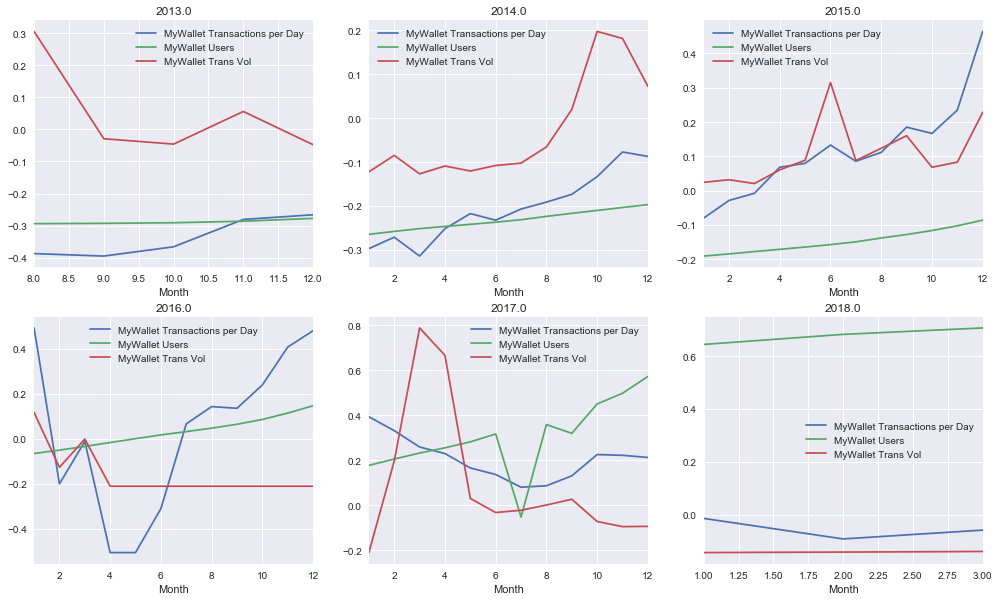

In [210]:
plotter(wmeannorm)

<h5>Plotting for the Market Capitalization information in the Dataframe which is grouped by year so as to get an overall picture of the change in market Capitalization for bitcoin which gives a better idea of the change over the years.</h5>

In [156]:
#Plotting market Capitalization 
##Getting data for Market Capitalization
mkcap=dfcleaned[["Market Cap","Year"]]
mkgroup=mkcap.groupby(["Year"])
mkmean=mkgroup.mean() # getting the mean of the groupby object returned after grouping the dataframe mkcap which contains 
#information for the market capitalization value over the years.
#normalizing the values so as to bring the values to a similar range in order to visualize the values changing over the years
#Z score normalization is used
mkmeannorm=(mkmean - mkmean.mean())/mkmean.std()

<h5>The market capitalization value for the different values is plotted using the dataframe containing the normalised grouped values.</h5>

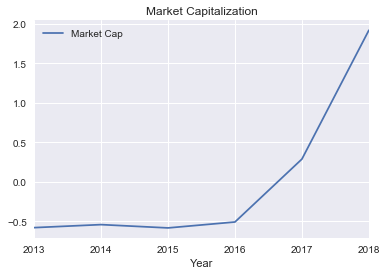

In [157]:
mkmeannorm.plot()
plt.title("Market Capitalization")
plt.xlabel("Year")
plt.show()

<h5>The plot shows a plateau for the years 2013,2014,2015 till 2016 but then the values are sky rocketing after 2016 at an exponential rate which matches with all the hype that starte from 2016 where the bitcoin prices also started sky rocketing</h5> 

<h5>Plotting the Total number of bitcoins available with the MarketPrice(USD) values of bitcoins to find trends and relationship between the two features to bring out patterns</h5>
<h5>Getting the MarketPrice(USD) and Total Bitcoins from the cleaned main dataframe and then grouped by year and month to get monthly average for each year and normalized to bring the scale of the two values with Z score normalization and then a plot is made for each year and their corresponding monthly values </h5>

In [212]:
#plotting for market price of bitcoin in USD and the corresponding number of bitcoins totally in the market
#Getting data for marketprice
mrktprice=dfcleaned[["MarketPrice (USD)","Total BTC","Year","Month"]]
mrktgrp=mrktprice.groupby(["Year","Month"])
mrktmean=mrktgrp.mean()
#normalizing the data using z score
mrktmeannorm=(mrktmean - mrktmean.mean())/mrktmean.std()

<h5>The function to plot the data according to year and month</h5>

In [213]:
def marketPlotData(mr):
    yearlist=[2013.0,2014.0,2015.0,2016.0,2017.0,2018.0]
    for year in yearlist:
        temp=mr.loc[year]
        temp.plot()
        plt.title("Year"+str(year))
        plt.xlabel("Month")
        plt.show()

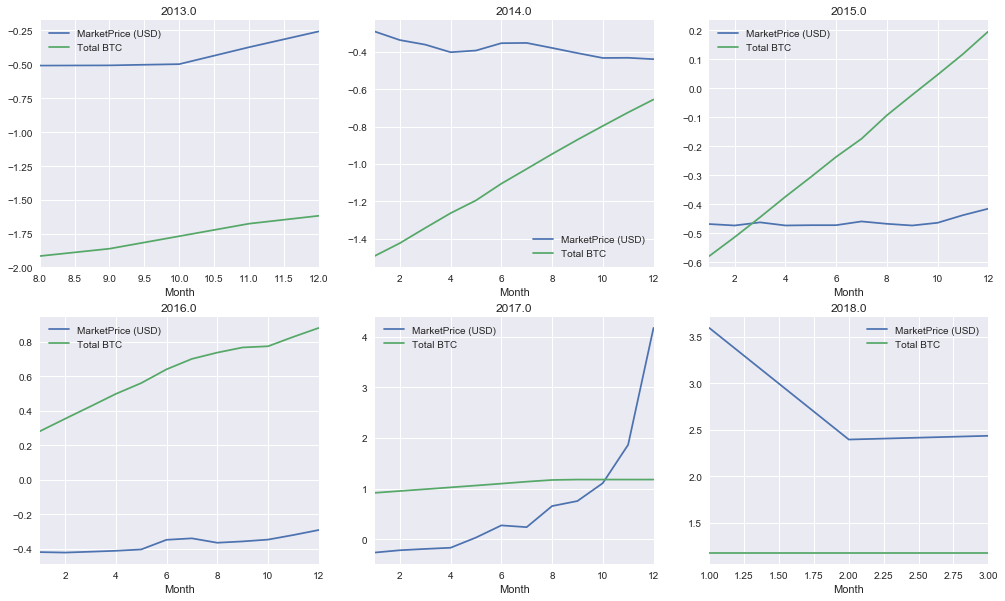

In [215]:
#calling the plotter function to create the subplots for the values
plotter(mrktmeannorm)

<h5>The plots show that corresponding values for marketprice for bitcoin and the total bitcoin number. It can be seen that the tnumber of bitcoins available in the market starts to increase by the end of 2013 and gradually picks up the increase in 2014 and then a significant increase in the year of 2015 and 2016. The market price value for the bitcoin can be seen to increase on a substantial scale in the year of 2017 from month 4 that is april and saw a dip in the market value in the year of 2018 till february and then seems to plateau off till march</h5>

<h5>To plot the data for all the years for the features MarketPrice in USD for bitcoin and the total bitcoin number. The year column is also extracted from the main cleaned dataframe dfcleaned to group the values by year to get the yearly average. The values are normalized using the Z score normalization and plotted to find patterns.</h5>

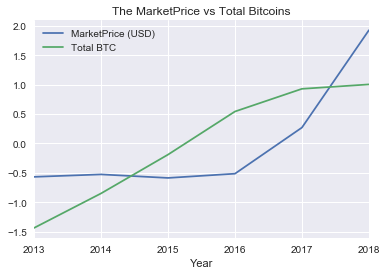

In [204]:
#plotting for all the years together to get a better idea of the change across the years
mrktyear=dfcleaned[["MarketPrice (USD)","Total BTC","Year"]]

mrkgrp=mrktyear.groupby("Year")# grouping by the year 
mrkmean=mrkgrp.mean()# getting the mean values for the groupeddataframe
mrkmeannorm=(mrkmean - mrkmean.mean())/mrkmean.std() # Z score normalization
mrkmeannorm.plot()
plt.title("The MarketPrice vs Total Bitcoins")
plt.xlabel("Year")
plt.show()

<h5>The data shows patterns where the total number of bitcoin plot tends to dip and decrease the rate of increase during the year 2016 which is the same year where the market price value of bitcoin starts to increase exponentially. The total number of bitcoins flattens out during the year of 2017 and the begining of 2018 shows a dramatic increase in the marketprice in USD for bitcoin. So a pattern where the decrease in rate of increase of total bitcoins have resulted in an increase in the MarketPrice of bitcoin.</h5>

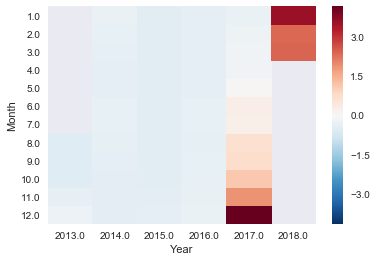

In [284]:
#plotting heatmaps for the feature - Market Price USD
tr=mrktmeannorm["MarketPrice (USD)"].unstack(level=0)
ax = sns.heatmap(tr)

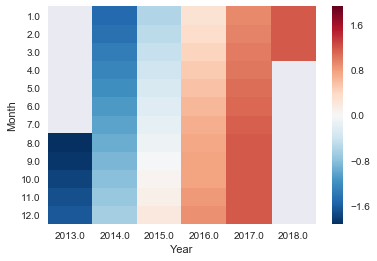

In [287]:
#plotting heatmaps for the feature - Total Number of Bitcoins
tr=mrktmeannorm["Total BTC"].unstack(level=0)#unstacking the index to plot the heatmap
ax = sns.heatmap(tr)

The above heatmaps are plotted for the two features and it helps in comparing the rate of change in both of the features

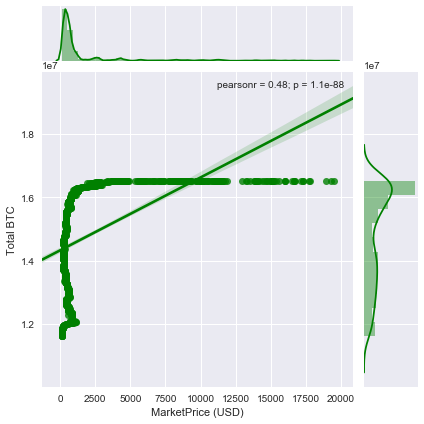

In [343]:
sns.jointplot(data=dfcleaned, x='MarketPrice (USD)', y='Total BTC', kind='reg', color='g')
sns.plt.show()

The above plot shows the jointplot and pearsonr correlation between the features MarketPrice(USD) and Total BTC. The pearson correlation coefficient shows that the there is moderate relationship between the two fetures.
ref:http://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/

/Applications/Anaconda/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


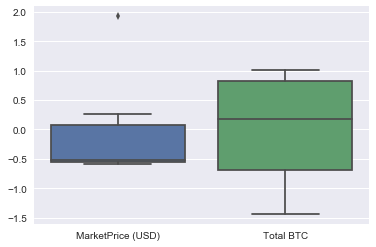

In [205]:
sns.boxplot(mrkmeannorm)

The box plot above shows boxplot for the features MArketPrice in USD for bitcoin and Total BTC . This shows that the total number of bitcoin has a wider box plot than MarketPrice of bitcoins in USD which means that total number of bitcoins has a wider range of values in the data associated with it

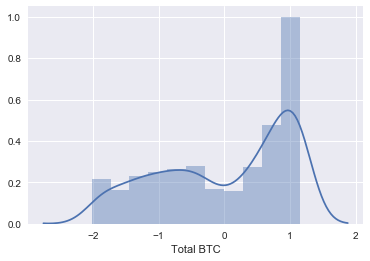

In [332]:
#BoxPlot showing the MarketPrice of bitcoin vs the Total Bitcoins
dslice=dfcleaned["Total BTC"]
dslicenorm=(dslice - dslice.mean())/dslice.std() # normalizing using z score normalization.
sns.distplot(dslicenorm)

The above plot is made using the help of the seaborn package. Is shows the histogram for the Total bitcoin numbers over the years.

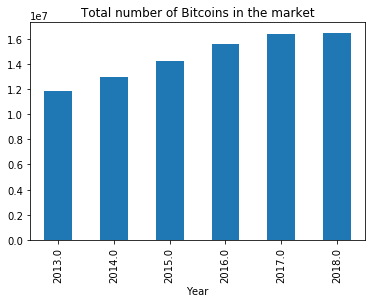

In [205]:
#Bar plot showing the total number of bitcoins in the corresponding years
mrkmean["Total BTC"].plot.bar()
plt.title("Total number of Bitcoins in the market")
plt.xlabel("Year")
plt.show()

The plot above shows a bar chart representation of the total number of bitcoins. The change in the number is evident from the years 2013 to 2016 after which the change tends to decrease.

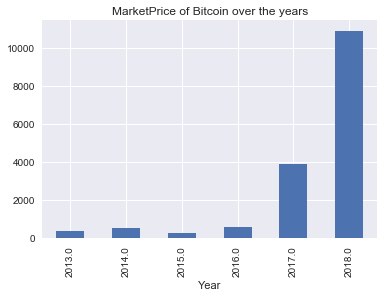

In [346]:
#Bar plot showing the change in bitcoin price in different years
mrkmean["MarketPrice (USD)"].plot.bar()
plt.title("MarketPrice of Bitcoin over the years")
plt.show()

The plot above shows the variations in the prices mean market price of a bitcoin over the years. It is evident from the bar chart plot that the there has not been much of a change in the variations og the change of bitcoin price in the years from 2013 to 2016 with alternating ups and dowsn but the year 2017 show a drastic change in the price of bitcoin which more than doubles the average price in 2016 and 2018 shows a higher mean price.Case of 2018 : data is only available for 3 month and avergae price of that might be higher than the other years considering the fact the prices have gone up in 2017 which might be a reason for the huge difference between 2017 and 2018.

<h5>Getting data from the cleaned dataset to plot the change in MarketPrice in USD for bitcoin over the years. The data is stpred to the btprice dataframe from the main dataframe dfcleaned by extracting the features "MarketPrice USD","Year" and "Month" which can be used to group the data by month and year.</h5>

In [208]:
#Plot to show the variation of the change in the prices of bitcoin over the years
btprice=dfcleaned[["MarketPrice (USD)","Year","Month"]]
btmean=btprice.groupby(["Year","Month"]).mean()


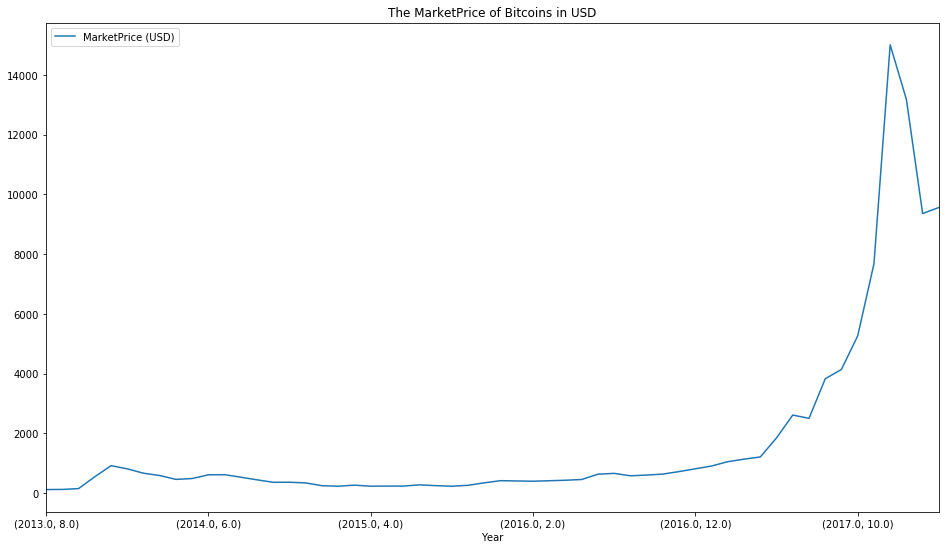

In [209]:
btmean.plot()
plt.rcParams["figure.figsize"] = [16,9]
plt.title("The MarketPrice of Bitcoins in USD")
plt.xlabel("Year")
plt.show()

<h5>The yearly plot above of the data for the marketprice for bitcoin shows small variations till the year of 2016 and then a steep increase after 2016 which peaks till the begining of 2017 and then drops down after that and then starts to pick up again after the dip.</h5>

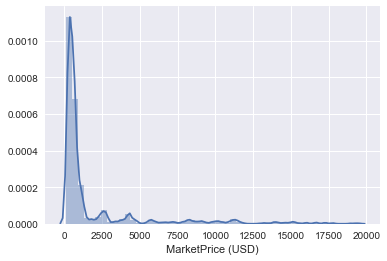

In [335]:
sns.distplot(dfcleaned["MarketPrice (USD)"])

The above is a histogram plot of the MarketPrices of Bitcoin in USD over the years in the collected data.

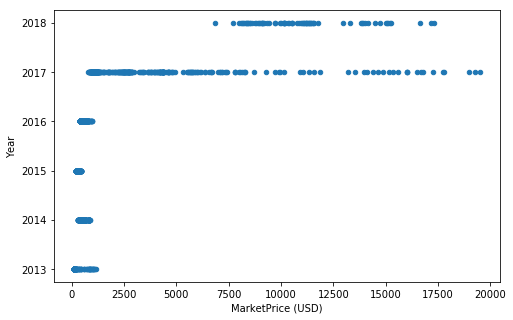

In [260]:
btprice.plot.scatter(x="MarketPrice (USD)",y="Year")

The above scatter plot shows the market price of bitcoin in the years from 2013-2018

<h5>Plotting for data for the features Difficulty and Next Difficulty according to the year and month columns grouping. The Bitcoin network difficulty is the measure of how difficult it is to find a new block compared to the easiest it can ever be.</h5>

In [217]:
#Plotting the difficulty and next difficulty values from the main dataframe
##### Getting data for Difficulty and next difficulty
diff=dfcleaned[["Difficulty","Next Difficulty","Year","Month"]]
diffgrp=diff.groupby(["Year","Month"])
diffmean=diffgrp.mean()

In [218]:
#normalizing the difficulty and next difficulty values
diffnorm=(diffmean - diffmean.mean())/diffmean.std() # normalizing using z score normalization.

In [219]:
#Function to plot difficulty values and next difficulty values for each year in the data available
def diffPlot(diff):
    yearlist=[2013.0,2014.0,2015.0,2016.0,2017.0,2018.0]
    for year in yearlist:
        temp=diff.loc[year]
        plt.rcParams["figure.figsize"] = [8,5]
        temp.plot()
        plt.title("Difficulty in Year"+str(year))
        plt.xlabel("Month")
        plt.show()

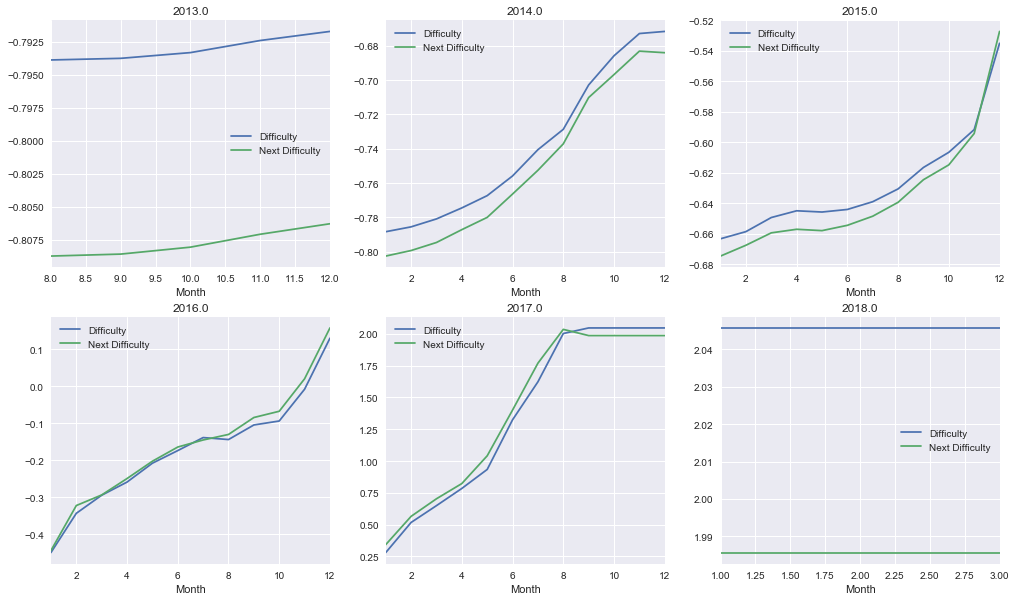

In [220]:
#diffPlot(diffnorm)
plotter(diffnorm)

<h5>The plots for difficulty and next difficulty values for the years in the data shows patterns where next difficulty values are are lesser than the difficulty values from the mid of 2016 and then till the august month of the year 2017 adn then goes back to the pattern where the difficulty value is higher than the next difficulty value.</h5>

In [222]:
#Plotting for transaction in last 24 hours and bitcoins sent last 24hrs
dailydata=dfcleaned[["Transactions last 24h","Bitcoins sent last 24h","Year","Month"]]

In [223]:
dailydatagrouped=dailydata.groupby(["Year","Month"])

In [224]:
dailymean=dailydatagrouped.mean()

In [225]:
#function to plot between Transactions last 24hrs and Bitcoins sent sent in the last 24hrs
def dailyplot(daily):
    yearlist=[2013.0,2014.0,2015.0,2016.0,2017.0,2018.0]
    for year in yearlist:
        temp=daily.loc[year]
        plt.rcParams["figure.figsize"] = [8,5]
        temp.plot()
        plt.title("Comparison in Year"+str(year))
        plt.xlabel("Month")
        plt.show()

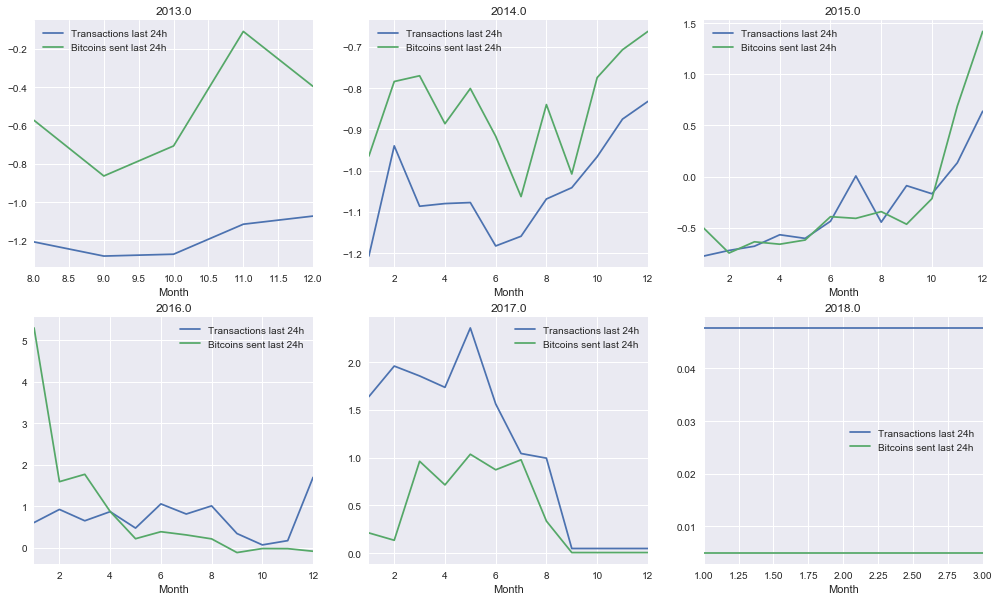

In [226]:
#normalizing the difficulty and next difficulty values
dailynorm=(dailymean - dailymean.mean())/dailymean.std() # normalizing using z score normalization.
#dailyplot(dailynorm)
plotter(dailynorm)

<h5>The plot between the Transactions Last 24hrs and the bitcoins sent last 24hrs shows a direct relationship between the two features. The increase and decrease of values between the features are comparable and and similar which is to be expected as the transfer of bitcoins can be a direct measure of the amount of transactions.</h5>

<h5>The plot to show the "Network Hashrate Terahashs","Network Hashrate PetaFLOPS" and their change over the years.</h5>

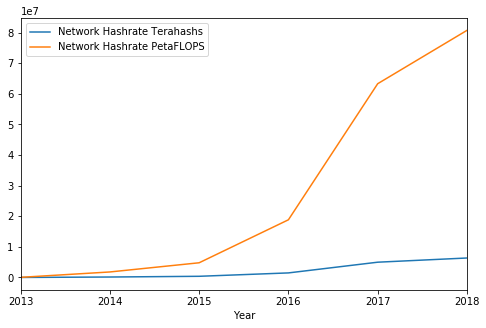

In [238]:
hashdata=dfcleaned[["Network Hashrate Terahashs","Network Hashrate PetaFLOPS","Year"]]
hashdatagrouped=hashdata.groupby(["Year"])
hashdatagrouped.mean().plot()

The above plot shows that the two features used to be of similar values till the 2015 and then the Network HashRate PetaFLOPS increase significantly from the other to a drastic increase.

Hash rate, or hash power as some call it, is the unit of measurement for the amount of computing power the Bitcoin network is consuming in order to be continuously operational. source:https://www.quora.com/What-does-Bitcoin-hash-rate-mean

<h3>Conclusion</h3>
The data from different apis were combined together based on the dates of the entries made and different combinations of features were plotted and analyzed to find patterns in the data.
From the analysis done between the features Total Number of bitcoins and their relationships it was found that they have a very simiar variations in change happening at the same time. When the marketprice of bitcoin starts to increaase then at exact time in the timeline over the years there is a dip starting in the total number of bitcoins available. Then the the number of bitcoins started to remain a constantly while the marketpriceof bitcoin increased drastically.

The Market Capitalization increased tremoundously for bitcoin after the year of 2016.

The difficulty and next difficulty values for the years in the data shows patterns where next difficulty values are are lesser than the difficulty values from the mid of 2016 and then till the august month of the year 2017 adn then goes back to the pattern where the difficulty value is higher than the next difficulty value.

There is an obvious direct relationship between the number of bitcoins sent last 24hours and transactions that happened last 24 hours.

The Market price of bitcoin saw a steady increase thets steeper after 2016 where it continued to peak at 2018 and the dip after it which correlates to the market hype that has been around bitcoin and the their prices falling down from that of last year is a hot topic of discussion and their possibilities of going up again is something that everybody is waiting for.

Analysis on Network Hashrate Terahashs,Network Hashrate PetaFLOPS shows that the two features used to be of similar values till the 2015 and then the Network HashRate PetaFLOPS increase significantly from the other to a drastic increase.

So we can conclude that bitcoin has come a long way into being one of the most talked about topics in the world. According to the analysis now is the time bitcoin prices have come down and this is the perfect time for people who wants to invest in bitcoin to invest and the past performances of bitcoin has been promising so there is a good chance that it is profitable to invest in bitcoins now.

<h4>Future Scope</h4>

More data can be collected and statistical analysis of the data can be done for example with pairs of features of the data to find relationship between features like MarketPrice of bitcoin to fit it into a model and then using the model to predict the future values for MarketPrice of bitcoin in the coming months and years.

Statistical Analysis can be heavily done on the data to find correlations among dataframes to find hidden patterns and more advanced analysis can be done to find the dependency of data features to find how change in one can be related to the change in another for example : how the change in total number of bitcoins affect the market capitalization for the bitcoins and analysis can be done to figure out how to keep the market capitalization high based on changes in different features which can be used to manipulate and control the bitcoin environment to make sure the bitcoin environment can keep maintining the good progress it showcased in the previous year.

More data features can be collected from different apis which can be combined to this dataset make new associations and relationships like getting data for the past public sentiment feeling for the precious years about bitcoin and how they correlate with the changes in the marketprice of the bitcoin can be used to better predict the bitcoin prices and trends in the future years


References<br/>
https://stackoverflow.com/questions/12525722/normalize-data-in-pandas<br/>
https://chrisalbon.com/python/data_wrangling/pandas_with_seaborn/<br/>
https://elitedatascience.com/python-seaborn-tutorial<br/>
https://www.tutorialspoint.com/python/python_exceptions.htm<br/>
https://www.bitcoinmining.com/what-is-bitcoin-mining-difficulty/<br/>
https://stackoverflow.com/questions/25386870/pandas-plotting-with-multi-index